In [21]:
import numpy as np
import matplotlib.pyplot as plt

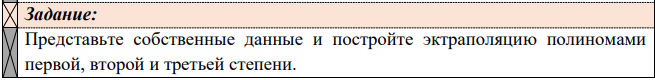

In [22]:
delta=2.0
x=np.linspace(-10,10,21)
y=x**3+x**2+x+delta*(np.random.rand(21)-0.5)
x+=delta*(np.random.rand(21)-0.5)

[  0.73895204   1.39892894  12.83865407 -15.39497301]
101


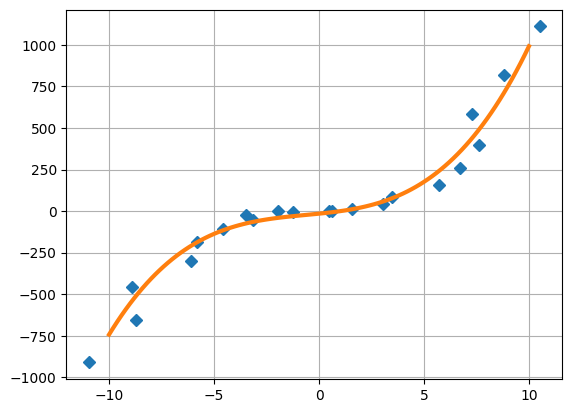

In [23]:
m=np.vstack((x**3,x**2,x,np.ones(21))).T
s=np.linalg.lstsq(m,y,rcond=None)[0]
print(s)
x_prec=np.linspace(-10,10,101)
plt.plot(x,y,"D")
print(len(x_prec))
plt.plot(x_prec,x_prec**3*s[0]+x_prec**2*s[1]+x_prec*s[2]+s[3],"-",lw=3)
plt.grid()
plt.show()

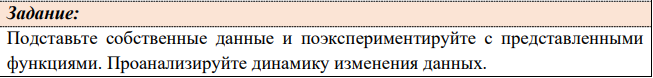

In [24]:
from scipy.optimize import curve_fit

In [25]:
beta=(0.4,1.24,0.15)
def f(x,n0,n1,n2):
    return n2**2+n1+n0*np.sin(x)
xdata=np.linspace(0,5,50)
y=f(xdata,*beta)
ydata=y+0.05*np.random.randn(len(xdata))
beta_opt,beta_cov= curve_fit(f,xdata,ydata)

lin_dev=sum(beta_cov[0])

residuals=ydata-f(xdata,*beta_opt)
fres=sum(residuals**2)
print(fres)

0.0998663244712369


Text(0, 0.5, '$f(x,\\beta)$')

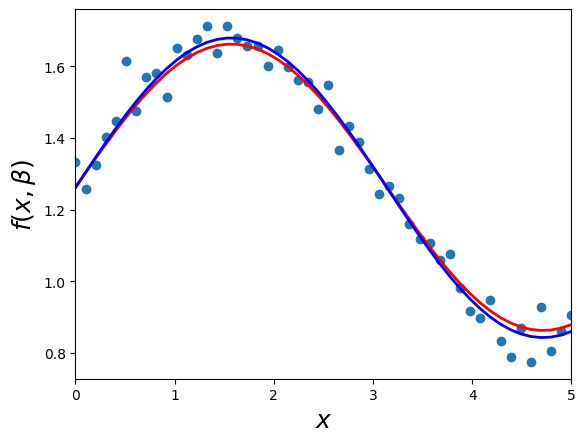

In [26]:
fig,ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,"r",lw=2)
ax.plot(xdata,f(xdata,*beta_opt),"b",lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$",fontsize= 18)
ax.set_ylabel(r"$f(x,\beta)$",fontsize=18)

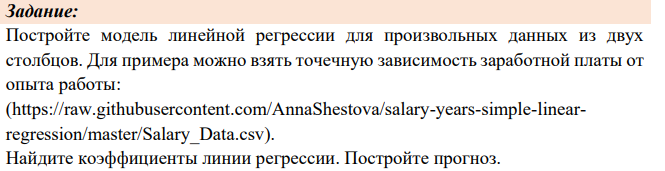

In [27]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [28]:
df = pd.read_csv("https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv")
df.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


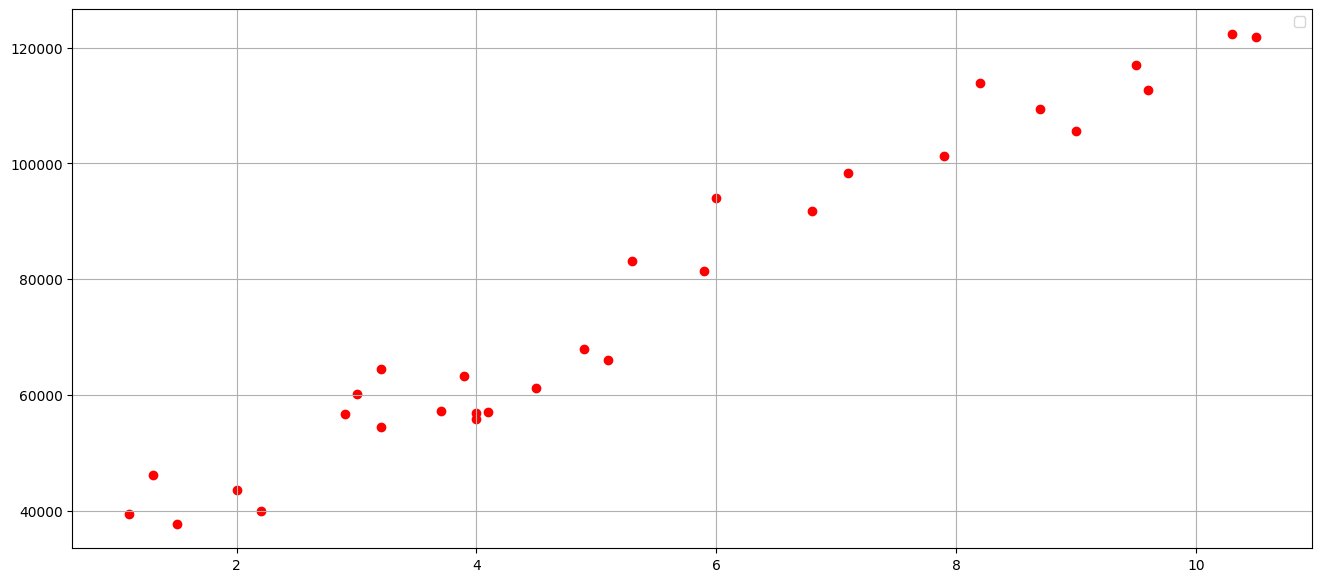

In [29]:
plt.figure(figsize=(16,7))
plt.scatter(df["YearsExperience"],df["Salary"],c="r")
plt.legend()
plt.grid()
plt.show()

In [30]:
X_train,X_test,y_train,y_test = train_test_split(df["YearsExperience"].to_numpy(),df["Salary"].to_numpy(),train_size=0.75)
X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [31]:
from sklearn.metrics import mean_absolute_error

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [32]:
y_pred=model.predict(X_test)
mean_absolute_error(y_pred=y_pred,y_true=y_test)

3599.9775170620796

In [33]:
print(model.intercept_[0],model.coef_[0][0])

27102.78736431589 9374.294182645435


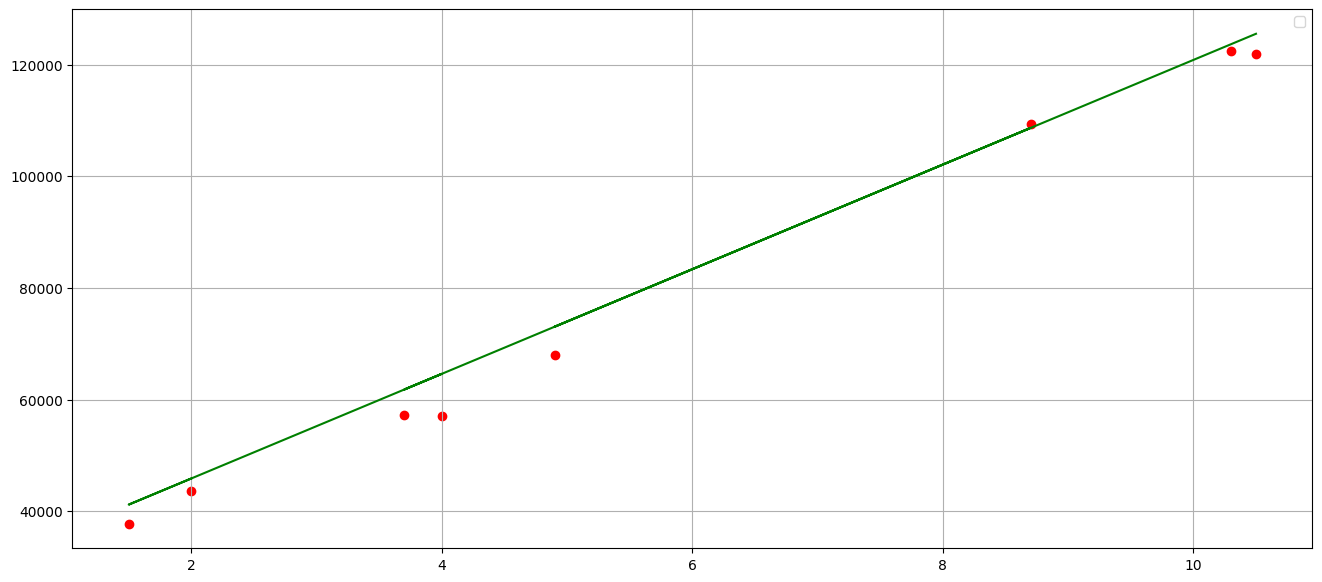

In [34]:
plt.figure(figsize=(16,7))
plt.scatter(X_test,y_test,c="r")
plt.plot(X_test,y_pred,c="g")
plt.legend()
plt.grid()
plt.show()

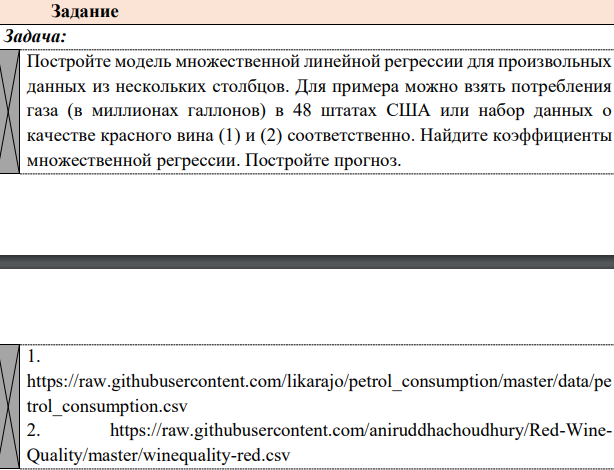

In [35]:
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------
df=pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [36]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns="quality").to_numpy(),df["quality"].to_numpy(),train_size=0.75)
y_train=y_train.reshape(-1,1)

In [37]:
X_train.shape

(1199, 11)

In [38]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [39]:
y_pred = model.predict(X_test)
mean_absolute_error(y_pred=y_pred,y_true=y_test)

0.48688213136878816

In [40]:
print(model.intercept_,model.coef_)

[51.93790802] [[ 6.96152386e-02 -1.06903826e+00 -2.33380599e-01  4.63714206e-02
  -1.47289782e+00  1.58441509e-03 -2.47216340e-03 -4.94591090e+01
  -6.34740539e-02  8.46754119e-01  2.68076571e-01]]
